In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.stats as sm

from matplotlib_venn import venn3
from scipy import stats

In [17]:
df = pd.read_csv('/content/Student Mental health.csv')

In [18]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [19]:
newnames = ["Timestamp", "Gender", "Age", "Major", "Year", "CGPA", "Married", "Depression", "Anxiety", "Panic Attacks", "Treated"]
df.columns = newnames
df.head()

,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [20]:
len(df.index)

101

In [21]:
df.isna().sum()

Timestamp        0
Gender           0
Age              1
Major            0
Year             0
CGPA             0
Married          0
Depression       0
Anxiety          0
Panic Attacks    0
Treated          0
dtype: int64

In [22]:
def to_binary(d):
    if d == "Yes"   : return 1
    if d == "No"    : return 0

df["Married"] = df["Married"].apply(to_binary)
df["Depression"] = df["Depression"].apply(to_binary)
df["Anxiety"] = df["Anxiety"].apply(to_binary)
df["Panic Attacks"] = df["Panic Attacks"].apply(to_binary)
df["Treated"] = df["Treated"].apply(to_binary)

df["Year"] = df["Year"].str[-1:]

df.head()

,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [23]:
has_smtn = list()
dep_col = df.columns.get_loc("Depression")
anx_col = df.columns.get_loc("Anxiety")
pa_col = df.columns.get_loc("Panic Attacks")

for row in range(len(df.index)):
    if df.iloc[row, dep_col] == 1:
        has_smtn.append(1)
    elif df.iloc[row, anx_col] == 1:
        has_smtn.append(1)
    elif df.iloc[row, pa_col] == 1:
        has_smtn.append(1)
    else:
        has_smtn.append(0)

df["Condition"] = has_smtn
df.head()

,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated,Condition
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,1
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0,1
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0,1
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,1
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,0


## Subsetting Datasets

In [24]:
depressed = df[(df["Depression"] == 1)]
anxious = df[(df["Anxiety"] == 1)]
panicking = df[(df["Panic Attacks"] == 1)]

In [25]:
has_condition = pd.concat([depressed, anxious, panicking]).drop_duplicates()
has_condition


,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated,Condition
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,1
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0,1
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,1
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,2,3.50 - 4.00,1,1,0,1,0,1
11,8/7/2020 12:39,Female,24.0,Engineering,3,3.50 - 4.00,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,8/7/2020 21:21,Female,18.0,Laws,3,3.50 - 4.00,0,0,0,1,0,1
77,9/7/2020 18:24,Female,18.0,Human Sciences,2,3.00 - 3.49,0,0,0,1,0,1
89,13/07/2020 11:54:58,Male,24.0,Engineering,2,2.00 - 2.49,0,0,0,1,0,1
90,13/07/2020 13:57:11,Female,23.0,DIPLOMA TESL,3,3.50 - 4.00,0,0,0,1,0,1


In [26]:
treated_subset = has_condition.loc[df["Treated"] == 1]
print(len(treated_subset))
treated_subset

6


,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated,Condition
28,8/7/2020 13:58,Female,24.0,BIT,3,3.50 - 4.00,1,1,1,1,1,1
33,8/7/2020 14:31,Male,18.0,BCS,2,3.50 - 4.00,1,1,1,0,1,1
39,8/7/2020 14:56,Female,24.0,Engineering,2,2.50 - 2.99,1,1,0,1,1,1
50,8/7/2020 15:27,Female,23.0,ALA,1,2.50 - 2.99,1,1,0,1,1,1
54,8/7/2020 15:57,Female,19.0,BCS,1,3.50 - 4.00,0,1,0,1,1,1
85,13/07/2020 10:33:47,Female,18.0,psychology,1,3.50 - 4.00,0,1,1,0,1,1


In [27]:
untreated_subset = has_condition.loc[df["Treated"] == 0]
print(len(untreated_subset))
untreated_subset.head()

58


,Timestamp,Gender,Age,Major,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated,Condition
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,1
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0,1
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,1
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,2,3.50 - 4.00,1,1,0,1,0,1
11,8/7/2020 12:39,Female,24.0,Engineering,3,3.50 - 4.00,1,1,0,0,0,1


In [28]:
only_depressed = depressed[(depressed["Anxiety"] == 0) & (depressed["Panic Attacks"] == 0)]
only_anxious = anxious[(anxious["Depression"] == 0) & (anxious["Panic Attacks"] == 0)]
only_panicking = panicking[(panicking["Depression"] == 0) & (panicking["Anxiety"] == 0)]
depressed_anxious = depressed[(depressed["Anxiety"] == 1) & (depressed["Panic Attacks"] == 0)]
depressed_panicking = depressed[(depressed["Anxiety"] == 0) & (depressed["Panic Attacks"] == 1)]
anxious_panicking = anxious[(anxious["Depression"] == 0) & (anxious["Panic Attacks"] == 1)]
all_three = has_condition[(has_condition["Depression"] == 1) & (has_condition["Anxiety"] == 1) & (has_condition["Panic Attacks"] == 1)]

## **Data Visualization**

In [29]:
num_depressed = (df["Depression"] == 1).sum()
num_anxious = (df["Anxiety"] == 1).sum()
num_pa = (df["Panic Attacks"] == 1).sum()
num_treated = (df["Treated"] == 1).sum()
num_w_condition = (df["Condition"] == 1).sum()
num_wo_condition = (df["Condition"] == 0).sum()

print("Depressed: {}\nAnxious: {}\nHaving panic attacks: {}\nBeing treated: {}\nTotal people with a condition: {}\nTotal people without: {}".format(num_depressed, num_anxious, num_pa, num_treated, num_w_condition, num_wo_condition))

Depressed: 35
Anxious: 34
Having panic attacks: 33
Being treated: 6
Total people with a condition: 64
Total people without: 37


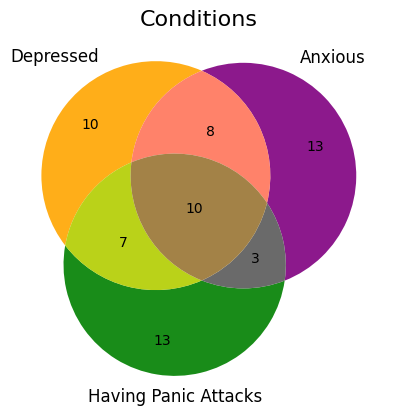

In [30]:
venn3(subsets = [set(depressed.index),
                 set(anxious.index),
                 set(panicking.index)],
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("orange", "purple", "green"),
      alpha = 0.9)

plt.title("Conditions", fontsize = 16)
plt.show()

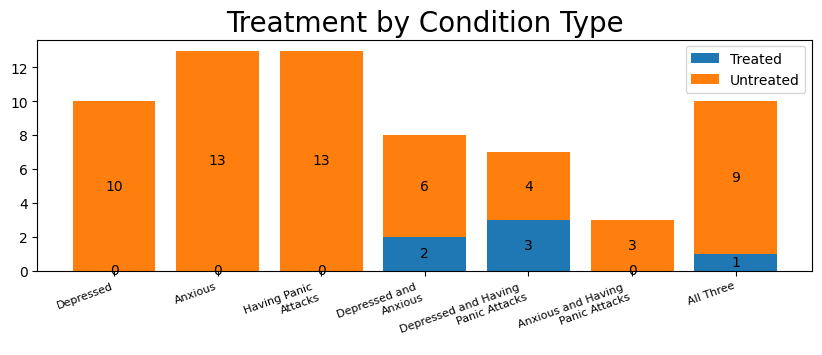

In [32]:
labels = ['Depressed', 'Anxious', 'Having Panic \nAttacks',
                'Depressed and \nAnxious', 'Depressed and Having \nPanic Attacks',
                'Anxious and Having \nPanic Attacks', 'All Three']

treated_counts = {
    "Treated" : [(only_depressed["Treated"] == 1).sum(),
                 (only_anxious["Treated"] == 1).sum(),
                 (only_panicking["Treated"] == 1).sum(),
                 (depressed_anxious["Treated"] == 1).sum(),
                 (depressed_panicking["Treated"] == 1).sum(),
                 (anxious_panicking["Treated"] == 1).sum(),
                 (all_three["Treated"] == 1).sum()],

    "Untreated" : [(only_depressed["Treated"] == 0).sum(),
                 (only_anxious["Treated"] == 0).sum(),
                 (only_panicking["Treated"] == 0).sum(),
                 (depressed_anxious["Treated"] == 0).sum(),
                 (depressed_panicking["Treated"] == 0).sum(),
                 (anxious_panicking["Treated"] == 0).sum(),
                 (all_three["Treated"] == 0).sum()]
}

fig, ax = plt.subplots(figsize = (10, 3))
bottom = np.zeros(7)

for treatment_type, treatment_count in treated_counts.items():
    p = ax.bar(labels,
                treatment_count,
                width = 0.8,
                label = treatment_type,
                bottom = bottom)
    bottom += treatment_count
    ax.bar_label(container = p,
                 label_type = 'center',
                 fontsize = 10)

ax.set_title("Treatment by Condition Type", fontsize = 20)
plt.xticks(fontsize = 8, ha = 'right', rotation = 20)
ax.legend()
plt.show()

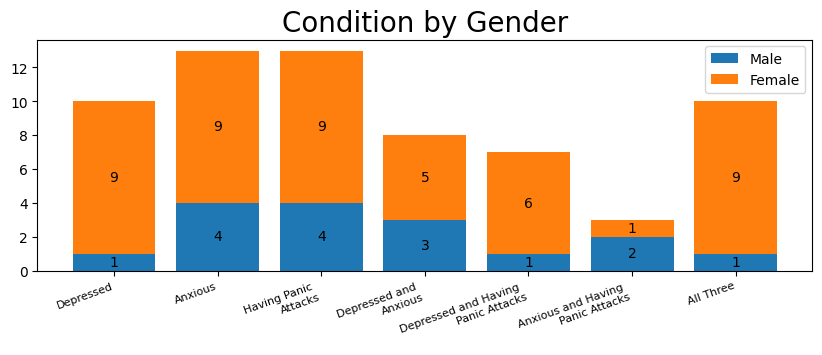

In [33]:
labels = ['Depressed', 'Anxious', 'Having Panic \nAttacks',
                'Depressed and \nAnxious', 'Depressed and Having \nPanic Attacks',
                'Anxious and Having \nPanic Attacks', 'All Three']

gender_counts = {
    "Male" : [(only_depressed["Gender"] == "Male").sum(),
                 (only_anxious["Gender"] == "Male").sum(),
                 (only_panicking["Gender"] == "Male").sum(),
                 (depressed_anxious["Gender"] == "Male").sum(),
                 (depressed_panicking["Gender"] == "Male").sum(),
                 (anxious_panicking["Gender"] == "Male").sum(),
                 (all_three["Gender"] == "Male").sum()],

    "Female" : [(only_depressed["Gender"] == "Female").sum(),
                 (only_anxious["Gender"] == "Female").sum(),
                 (only_panicking["Gender"] == "Female").sum(),
                 (depressed_anxious["Gender"] == "Female").sum(),
                 (depressed_panicking["Gender"] == "Female").sum(),
                 (anxious_panicking["Gender"] == "Female").sum(),
                 (all_three["Gender"] == "Female").sum()]
}

fig, ax = plt.subplots(figsize = (10, 3))
bottom = np.zeros(7)

for gender, gender_count in gender_counts.items():
    p = ax.bar(labels,
                gender_count,
                width = 0.8,
                label = gender,
                bottom = bottom)
    bottom += gender_count
    ax.bar_label(container = p,
                 label_type = 'center',
                 fontsize = 10)

ax.set_title("Condition by Gender", fontsize = 20)
plt.xticks(fontsize = 8, ha = 'right', rotation = 20)
ax.legend()
plt.show()

In [34]:
print("Females: " + str((df["Gender"] == "Female").sum()) + "\nMales: " + str((df["Gender"] == "Male").sum()))

Females: 75
Males: 26


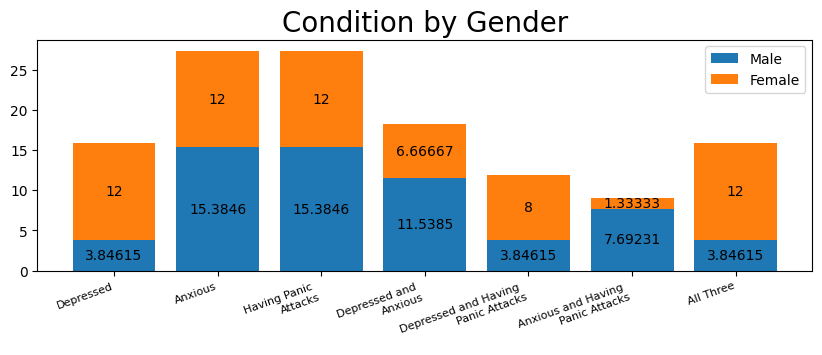

In [35]:
labels = ['Depressed', 'Anxious', 'Having Panic \nAttacks',
                'Depressed and \nAnxious', 'Depressed and Having \nPanic Attacks',
                'Anxious and Having \nPanic Attacks', 'All Three']

gender_counts = {
    "Male" : [(only_depressed["Gender"] == "Male").sum(),
                 (only_anxious["Gender"] == "Male").sum(),
                 (only_panicking["Gender"] == "Male").sum(),
                 (depressed_anxious["Gender"] == "Male").sum(),
                 (depressed_panicking["Gender"] == "Male").sum(),
                 (anxious_panicking["Gender"] == "Male").sum(),
                 (all_three["Gender"] == "Male").sum()],

    "Female" : [(only_depressed["Gender"] == "Female").sum(),
                 (only_anxious["Gender"] == "Female").sum(),
                 (only_panicking["Gender"] == "Female").sum(),
                 (depressed_anxious["Gender"] == "Female").sum(),
                 (depressed_panicking["Gender"] == "Female").sum(),
                 (anxious_panicking["Gender"] == "Female").sum(),
                 (all_three["Gender"] == "Female").sum()]
}

# The variables won't make as much sense now, but I'm changing individual counts to percentages.
# For example, instead of depressed males being 1 and depressed females being 9,
# it will be 3.8 % of males are depressed and 12% of females are depressed.
# This makes it more fair to compare the two.

gender_counts["Male"] = gender_counts["Male"] / ((df["Gender"] == "Male").sum()) * 100
gender_counts["Female"] = gender_counts["Female"] / ((df["Gender"] == "Female").sum()) * 100

fig, ax = plt.subplots(figsize = (10, 3))
bottom = np.zeros(7)

for gender, gender_count in gender_counts.items():
    p = ax.bar(labels,
                gender_count,
                width = 0.8,
                label = gender,
                bottom = bottom)
    bottom += gender_count
    ax.bar_label(container = p,
                 label_type = 'center',
                 fontsize = 10)

ax.set_title("Condition by Gender", fontsize = 20)
plt.xticks(fontsize = 8, ha = 'right', rotation = 20)
ax.legend()
plt.show()

## CGPA v. Year v. Condition

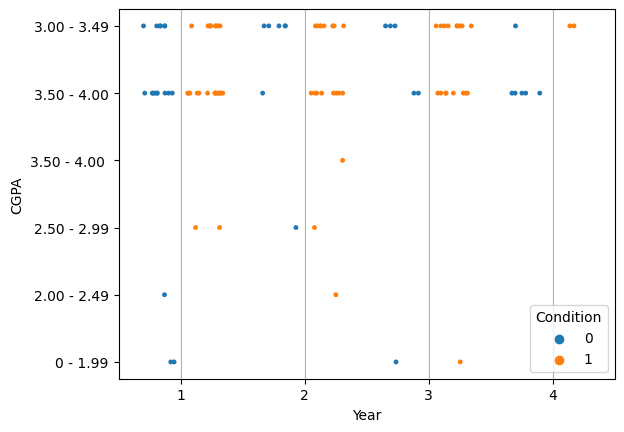

In [36]:
import warnings
warnings.filterwarnings('ignore')
grid = sns.stripplot(data = df, x = "Year", y = "CGPA", hue = "Condition", dodge = True, jitter = 0.3, size = 3.5)
plt.grid(axis = 'x')
plt.show()

In [37]:
new_gpas = list()
cgpa = df.columns.get_loc("CGPA")

for row in range(len(df.index)):
    bounds = df.iloc[row, cgpa]
    bounds = bounds.split()
    del bounds[1]
    for index, b in enumerate(bounds):
        b = float(b)
        bounds[index] = b
    new_gpas.append(float(f'{random.uniform(*bounds):1.2f}'))

In [38]:
df["New GPA"] = new_gpas

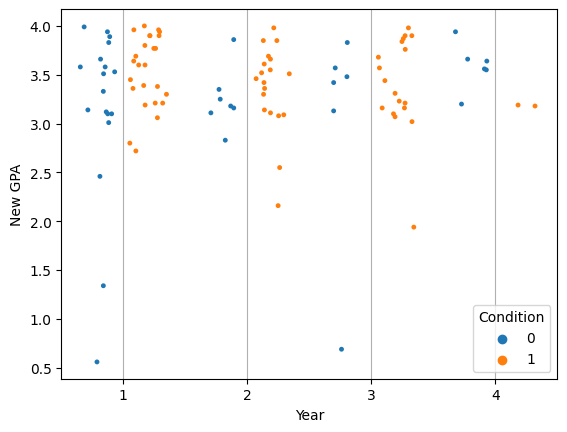

In [39]:
grid = sns.stripplot(data = df, x = "Year", y = "New GPA", hue = "Condition", dodge = True, jitter = 0.3, size = 3.5)
plt.grid(axis = 'x')
plt.show()

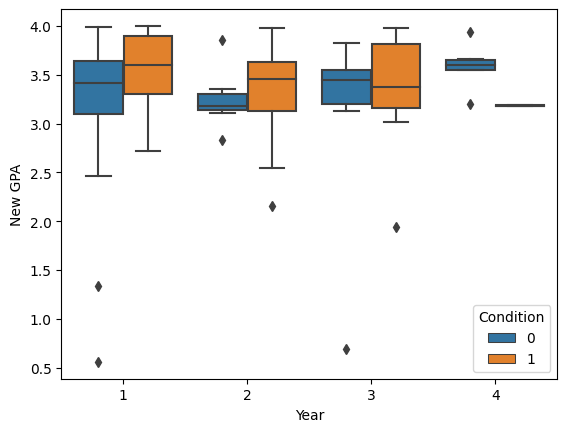

In [40]:
fig, ax = plt.subplots()
sns.boxplot(data = df, x = "Year", y = "New GPA", hue = "Condition")
plt.show()

## GPA v. Condition

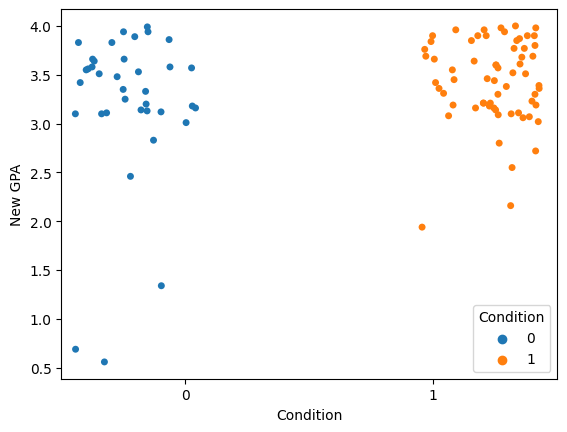

In [41]:
fig, ax = plt.subplots()
sns.stripplot(data = df, x = "Condition", y = "New GPA", hue = "Condition", dodge = True, jitter = 0.5, size = 5)
plt.show()

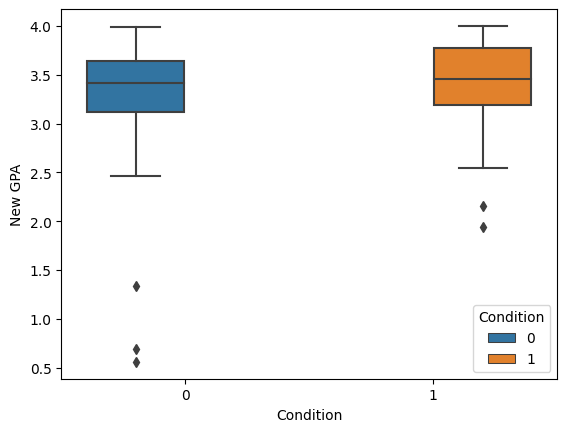

In [42]:
fig, ax = plt.subplots()
sns.boxplot(data = df, x = "Condition", y = "New GPA", hue = "Condition", )
plt.show()

## **F-Test for variances**

H0 : Variances are equal

HA : Variances are not equal

In [43]:
cond = df[df["Condition"] == 1]["New GPA"]
no_cond = df[df["Condition"] == 0]["New GPA"]

cond_var = np.var(cond)
no_cond_var = np.var(no_cond)
f_val = cond_var / no_cond_var

cond_df = len(cond) - 1             # DEGREES OF FREEDOM, NOT DATAFRAME!
no_cond_df = len(no_cond) - 1       # DEGREES OF FREEDOM, NOT DATAFRAME!

p_value = stats.f.cdf(f_val, cond_df, no_cond_df)

print("F-Statistic: {}\np-value: {}".format(f_val, p_value))

F-Statistic: 0.2952083478819229
p-value: 1.1101059578207174e-05


## **Wilcoxon Rank-Sum Test**

Wilcoxon Rank-Sum is the nonparametric version of an independent t-test.

H0 : Two groups are drawn from the same distribution

HA : Values in one sample are more likely to be larger or smaller than the values in the other sample

In [44]:
stats.ranksums(cond, no_cond, alternative = 'two-sided')

RanksumsResult(statistic=1.155961942590932, pvalue=0.24769672406653842)

We fail to reject the null that the two groups have the same distribution.
Although Wilcoxon Rank-Sum isn't as strong as a t-test, it seems that there is no difference in the distribution of GPAs for people with a mental health condition versus people without.